In [14]:
import pandas as pd

df = pd.read_csv('C:/Users/n6630/Desktop/LABA1/travis_scott_clean.csv')
display(df.head())
df.info()
df['release_date'] = pd.to_datetime(df['release_date'])

,track_id,track_name,album_id,album_name,release_date,artists,is_travis_main,track_number,duration_ms,explicit,duration_seconds,popularity
0,69cLn7zwq2oIfnahAOIwV1,JB2 RADIO,32lGAqeVkdJxEj2iv2Q01B,JACKBOYS 2,2025-07-13,JACKBOYS,0,1,31507,1,31.51,53
1,5wNIHa6wvCCKP6fWgo3UAh,CHAMPAIN & VACAY,32lGAqeVkdJxEj2iv2Q01B,JACKBOYS 2,2025-07-13,"Travis Scott, Don Toliver",1,2,184789,1,184.79,72
2,6Gp3pYkydEOkl8EHHJxa9s,2000 EXCURSION,32lGAqeVkdJxEj2iv2Q01B,JACKBOYS 2,2025-07-13,"Travis Scott, Sheck Wes, Don Toliver",1,3,222986,1,222.99,67
3,5P03xImM2uFukzoty7NDw7,KICK OUT,32lGAqeVkdJxEj2iv2Q01B,JACKBOYS 2,2025-07-13,Travis Scott,1,4,170498,1,170.50,74
4,1rQEgtQNsj63xIUzEmKbML,DUMBO,32lGAqeVkdJxEj2iv2Q01B,JACKBOYS 2,2025-07-13,Travis Scott,1,5,238249,1,238.25,74


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          115 non-null    object 
 1   track_name        115 non-null    object 
 2   album_id          115 non-null    object 
 3   album_name        115 non-null    object 
 4   release_date      115 non-null    object 
 5   artists           115 non-null    object 
 6   is_travis_main    115 non-null    int64  
 7   track_number      115 non-null    int64  
 8   duration_ms       115 non-null    int64  
 9   explicit          115 non-null    int64  
 10  duration_seconds  115 non-null    float64
 11  popularity        115 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 10.9+ KB


In [15]:
display(df.isnull().sum())
print('Количество дубликатов:')
duplicate_rows = df.duplicated().sum()
if duplicate_rows > 0:
    print(f'{duplicate_rows} дублирующихся строк найдено.')
else:
    print('Дублирующихся строк нет.')

track_id            0
track_name          0
album_id            0
album_name          0
release_date        0
artists             0
is_travis_main      0
track_number        0
duration_ms         0
explicit            0
duration_seconds    0
popularity          0
dtype: int64

Количество дубликатов:
Дублирующихся строк нет.


In [16]:
print('Описательная статистика для числовых столбцов:')
display(df.describe())
print('\nОписательная статистика для нечисловых столбцов:')
display(df.describe(include='object'))

Описательная статистика для числовых столбцов:


,release_date,is_travis_main,track_number,duration_ms,explicit,duration_seconds,popularity
count,115,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000
mean,2019-05-28 19:37:02.608695552,0.930435,8.121739,223295.686957,0.965217,223.295739,65.078261
min,2014-08-18 00:00:00,0.000000,1.000000,31507.000000,0.000000,31.510000,46.000000
25%,2016-09-16 00:00:00,1.000000,4.000000,183975.000000,1.000000,183.975000,59.000000
50%,2018-08-03 00:00:00,1.000000,8.000000,217828.000000,1.000000,217.830000,64.000000
75%,2023-07-28 00:00:00,1.000000,12.000000,254752.000000,1.000000,254.750000,70.000000
max,2025-07-13 00:00:00,1.000000,19.000000,461840.000000,1.000000,461.840000,85.000000
std,NaN,0.255526,4.752004,66719.446339,0.184031,66.719200,8.250622



Описательная статистика для нечисловых столбцов:


,track_id,track_name,album_id,album_name,artists
count,115,115,115,115,115
unique,115,115,8,8,52
top,69cLn7zwq2oIfnahAOIwV1,JB2 RADIO,18NOKLkZETa4sWwLMIm0UZ,UTOPIA,Travis Scott
freq,1,1,19,19,52


In [17]:
print('Подсчёт уникальных значений и их частота для каждого столбца:')
for col in df.columns:
    print(f'\n=== Столбец: {col} ===')
    if df[col].dtype == 'object' or isinstance(df[col].dtype, pd.CategoricalDtype):
        display(df[col].value_counts())
    elif df[col].nunique() < 20:
        display(df[col].value_counts())
    else:
        print(f'Столбец \'{col}\' имеет {df[col].nunique()} уникальных значений.')
        print('Пример первых 5 уникальных значений:')
        display(df[col].value_counts().head())

Подсчёт уникальных значений и их частота для каждого столбца:

=== Столбец: track_id ===


track_id
69cLn7zwq2oIfnahAOIwV1    1
1cZlBZwnwGPtYeRIeQcoFh    1
2AGUFka8kBWCM47h5uTlDb    1
20dP2DaMHIAmwWAbp7peSr    1
6wwruKU956ldDyz55DZTt1    1
                         ..
1i9lZvlaDdWDPyXEE95aiq    1
4o82J5zr4DFEs9yj5szCVX    1
0a4SMs889NwP8oWI7Vemle    1
7EiUtdeoWcKqLi5ELZCjYf    1
78fsyPMBiIMOXdBnDcBi7z    1
Name: count, Length: 115, dtype: int64


=== Столбец: track_name ===


track_name
JB2 RADIO                               1
wonderful                               1
lose                                    1
pick up the phone (feat. Quavo)         1
first take                              1
                                       ..
TELEKINESIS (feat. SZA & Future)        1
K-POP (feat. Bad Bunny & The Weeknd)    1
LOOOVE (feat. Kid Cudi)                 1
LOST FOREVER (feat. Westside Gunn)      1
BACC (Bonus)                            1
Name: count, Length: 115, dtype: int64


=== Столбец: album_id ===


album_id
18NOKLkZETa4sWwLMIm0UZ    19
32lGAqeVkdJxEj2iv2Q01B    17
41GuZcammIkupMPKH2OJ6I    17
4PWBTB6NYSKQwfo79I3prg    16
42WVQWuf1teDysXiOupIZt    14
6FED8aeieEnUWwQqAO9zT1    13
54Y471E7GNBSOXjZtqONId    12
1Sf8GsXG32t0jNrX11xqWx     7
Name: count, dtype: int64


=== Столбец: album_name ===


album_name
UTOPIA                             19
JACKBOYS 2                         17
ASTROWORLD                         17
Rodeo                              16
Birds In The Trap Sing McKnight    14
Huncho Jack, Jack Huncho           13
DAYS BEFORE RODEO                  12
JACKBOYS                            7
Name: count, dtype: int64


=== Столбец: release_date ===


release_date
2023-07-28    19
2025-07-13    17
2018-08-03    17
2015-09-04    16
2016-09-16    14
2017-12-21    13
2014-08-18    12
2019-12-27     7
Name: count, dtype: int64


=== Столбец: artists ===


artists
Travis Scott                                 52
Huncho Jack, Travis Scott, Quavo             11
JACKBOYS                                      2
Travis Scott, Young Thug                      2
Travis Scott, Quavo                           1
Travis Scott, ROSALÍA, Lil Baby               1
JACKBOYS, Sheck Wes                           1
Don Toliver, Quavo, Offset                    1
JACKBOYS, Travis Scott, Young Thug            1
JACKBOYS, Travis Scott, Don Toliver           1
JACKBOYS, Pop Smoke, Travis Scott             1
Huncho Jack, Travis Scott, Quavo, Takeoff     1
Huncho Jack, Travis Scott, Quavo, Offset      1
Young Thug, Travis Scott, Quavo               1
Travis Scott, Future, 2 Chainz                1
Travis Scott, SZA, Future                     1
Travis Scott, Juicy J                         1
Travis Scott, Kacy Hill                       1
Travis Scott, The Weeknd                      1
Travis Scott, Swae Lee, Chief Keef            1
Travis Scott, Kanye West        


=== Столбец: is_travis_main ===


is_travis_main
1    107
0      8
Name: count, dtype: int64


=== Столбец: track_number ===


track_number
1     8
2     8
3     8
4     8
5     8
6     8
7     8
12    7
11    7
10    7
9     7
8     7
13    6
14    5
15    4
16    4
17    3
18    1
19    1
Name: count, dtype: int64


=== Столбец: duration_ms ===
Столбец 'duration_ms' имеет 115 уникальных значений.
Пример первых 5 уникальных значений:


duration_ms
31507     1
216945    1
200452    1
252256    1
313909    1
Name: count, dtype: int64


=== Столбец: explicit ===


explicit
1    111
0      4
Name: count, dtype: int64


=== Столбец: duration_seconds ===
Столбец 'duration_seconds' имеет 115 уникальных значений.
Пример первых 5 уникальных значений:


duration_seconds
31.51     1
216.94    1
200.45    1
252.26    1
313.91    1
Name: count, dtype: int64


=== Столбец: popularity ===
Столбец 'popularity' имеет 34 уникальных значений.
Пример первых 5 уникальных значений:


popularity
67    9
56    7
64    7
61    7
65    7
Name: count, dtype: int64

In [18]:
print('Корреляционная матрица для числовых столбцов:')
display(df.corr(numeric_only=True))

Корреляционная матрица для числовых столбцов:


,is_travis_main,track_number,duration_ms,explicit,duration_seconds,popularity
is_travis_main,1.000000,0.108173,0.372859,-0.051906,0.372861,0.164875
track_number,0.108173,1.000000,0.076524,-0.165636,0.076520,0.004453
duration_ms,0.372859,0.076524,1.000000,0.088218,1.000000,0.206886
explicit,-0.051906,-0.165636,0.088218,1.000000,0.088219,-0.096404
duration_seconds,0.372861,0.076520,1.000000,0.088219,1.000000,0.206885
popularity,0.164875,0.004453,0.206886,-0.096404,0.206885,1.000000


Построение гистограмм для числовых столбцов:


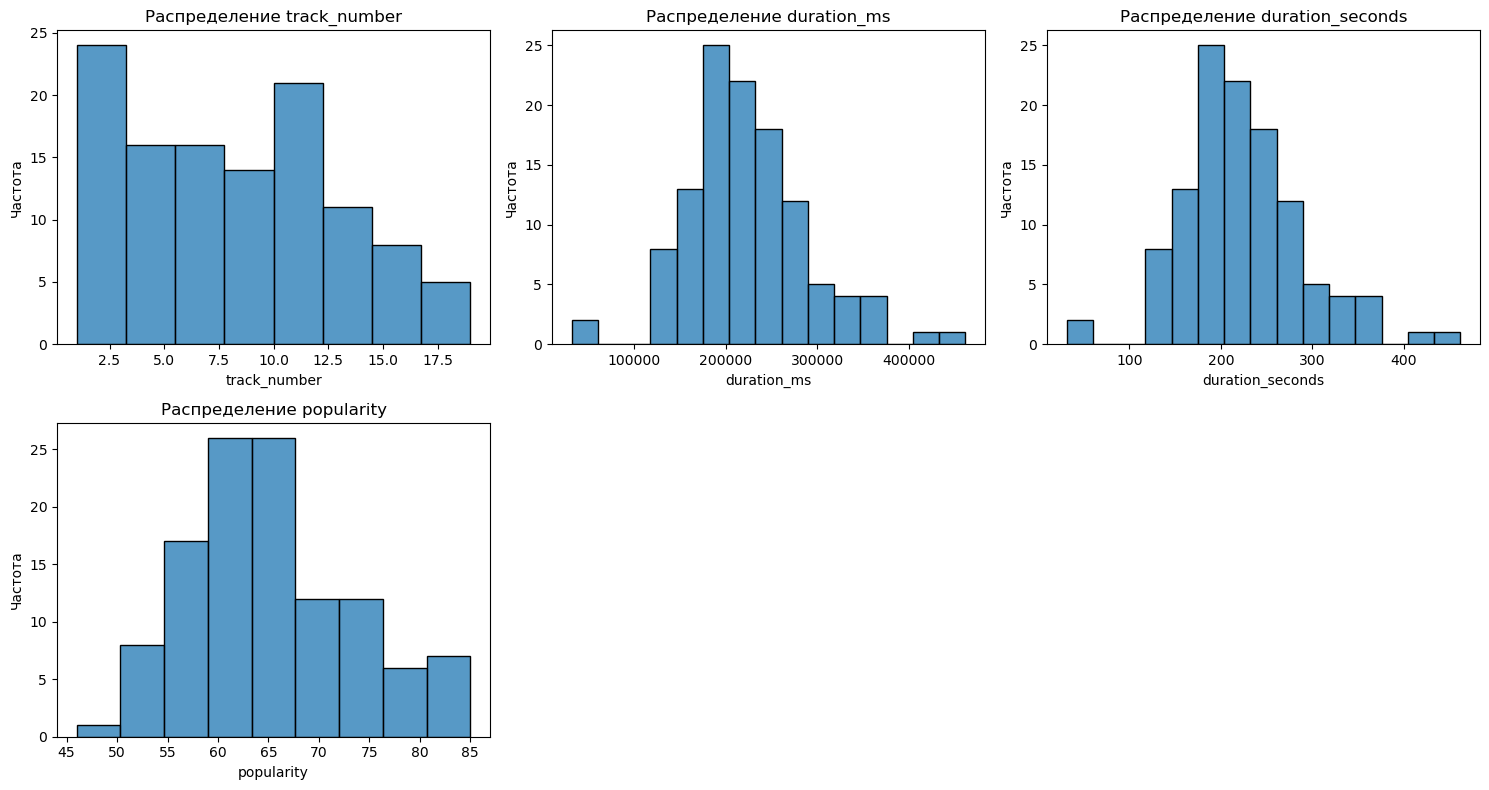

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

print('Построение гистограмм для числовых столбцов:')

# Выбираем только числовые столбцы
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

numeric_cols = numeric_cols.drop(['explicit', 'is_travis_main'], errors='ignore')


num_plots = len(numeric_cols)
if num_plots == 0:
    print('Числовых столбцов для построения гистограмм не найдено.')
else:
    num_cols_subplot = 3 # Например, 3 столбца
    num_rows_subplot = (num_plots + num_cols_subplot - 1) // num_cols_subplot
    
    plt.figure(figsize=(num_cols_subplot * 5, num_rows_subplot * 4))
    for i, col in enumerate(numeric_cols):
        plt.subplot(num_rows_subplot, num_cols_subplot, i + 1)
        sns.histplot(df[col], kde=False) # Изменено: kde=False
        plt.title(f'Распределение {col}')
        plt.xlabel(col)
        plt.ylabel('Частота')
    plt.tight_layout()
    plt.show()

Построение линейного графика популярности треков по дате выпуска:


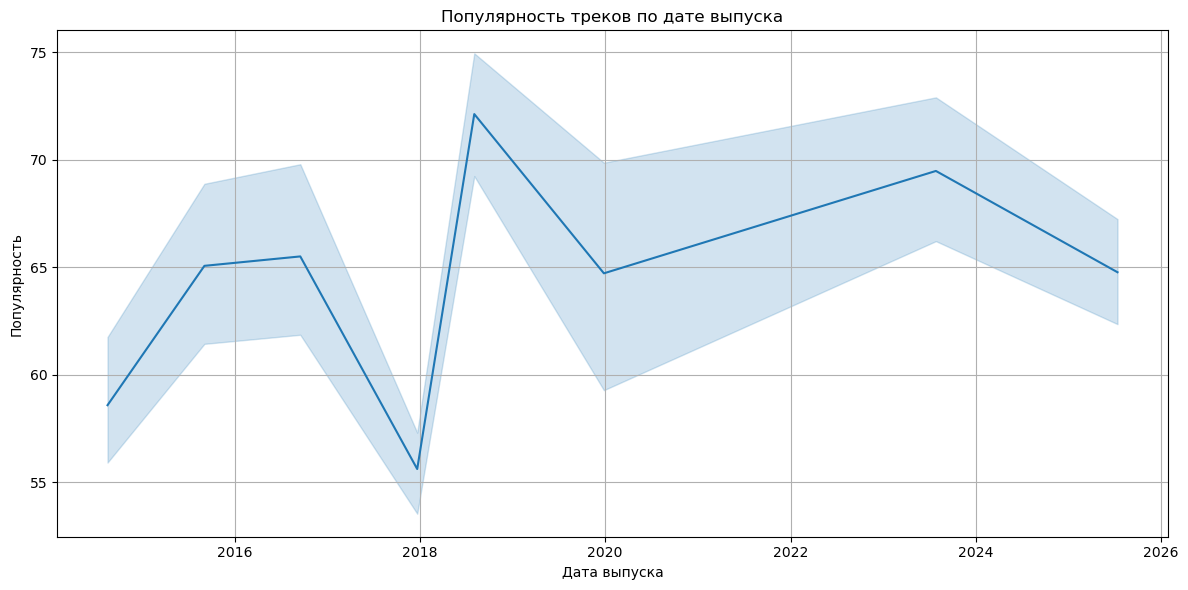

In [20]:
print('Построение линейного графика популярности треков по дате выпуска:')

plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='release_date', y='popularity')
plt.title('Популярность треков по дате выпуска')
plt.xlabel('Дата выпуска')
plt.ylabel('Популярность')
plt.grid(True)
plt.tight_layout()
plt.show()

Построение столбчатой диаграммы для количества треков по альбомам:


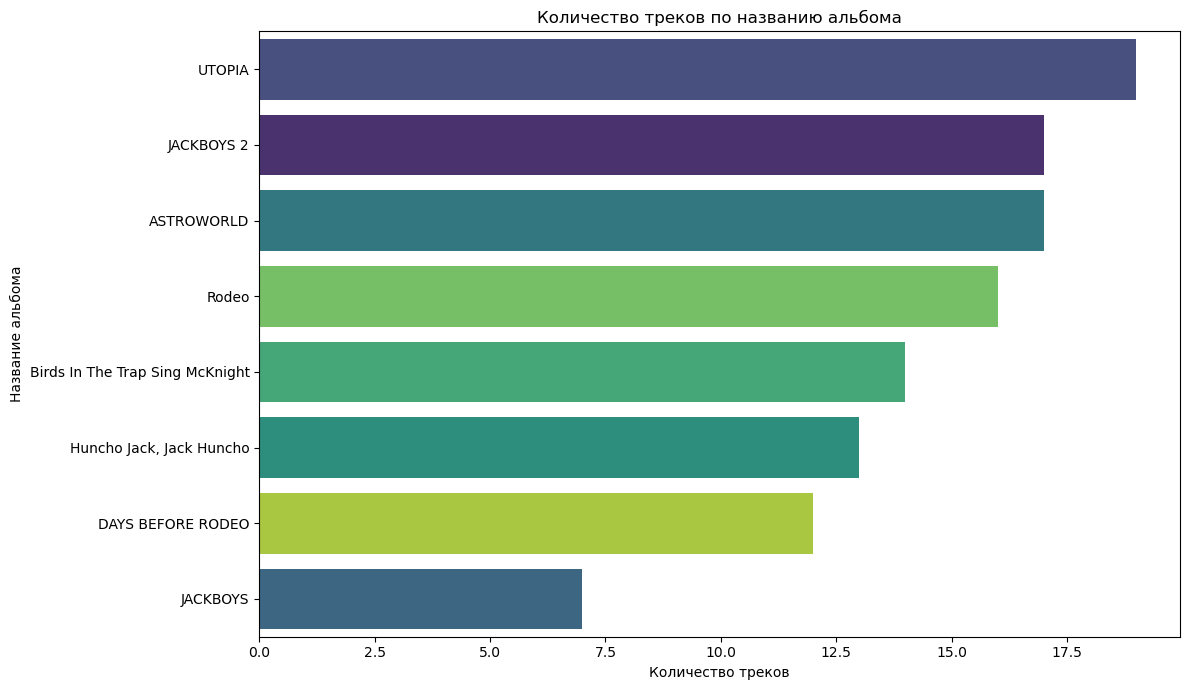

In [21]:
print('Построение столбчатой диаграммы для количества треков по альбомам:')

plt.figure(figsize=(12, 7))
sns.countplot(data=df, y='album_name', hue='album_name', order = df['album_name'].value_counts().index, palette='viridis', legend=False)
plt.title('Количество треков по названию альбома')
plt.xlabel('Количество треков')
plt.ylabel('Название альбома')
plt.tight_layout()
plt.show()

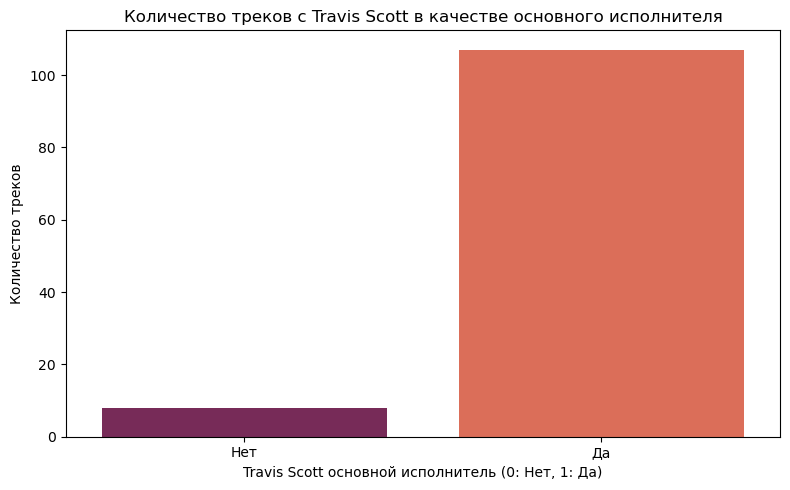

In [22]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='is_travis_main', hue='is_travis_main', palette='rocket', legend=False)
plt.title('Количество треков с Travis Scott в качестве основного исполнителя')
plt.xlabel('Travis Scott основной исполнитель (0: Нет, 1: Да)')
plt.ylabel('Количество треков')
plt.xticks([0, 1], ['Нет', 'Да'])
plt.tight_layout()
plt.show()

Построение столбчатой диаграммы для количества треков с ненормативной лексикой:


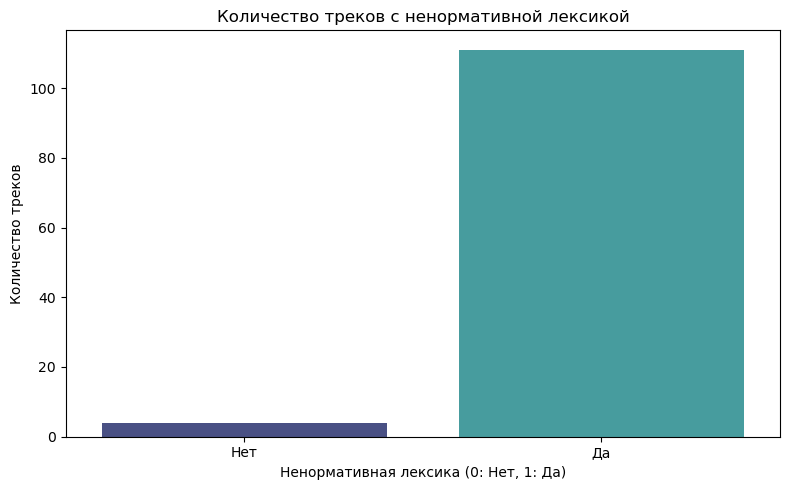

In [23]:
print('Построение столбчатой диаграммы для количества треков с ненормативной лексикой:')

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='explicit', hue='explicit', palette='mako', legend=False)
plt.title('Количество треков с ненормативной лексикой')
plt.xlabel('Ненормативная лексика (0: Нет, 1: Да)')
plt.ylabel('Количество треков')
plt.xticks([0, 1], ['Нет', 'Да'])
plt.tight_layout()
plt.show()

Построение boxplot для популярности треков по альбомам:


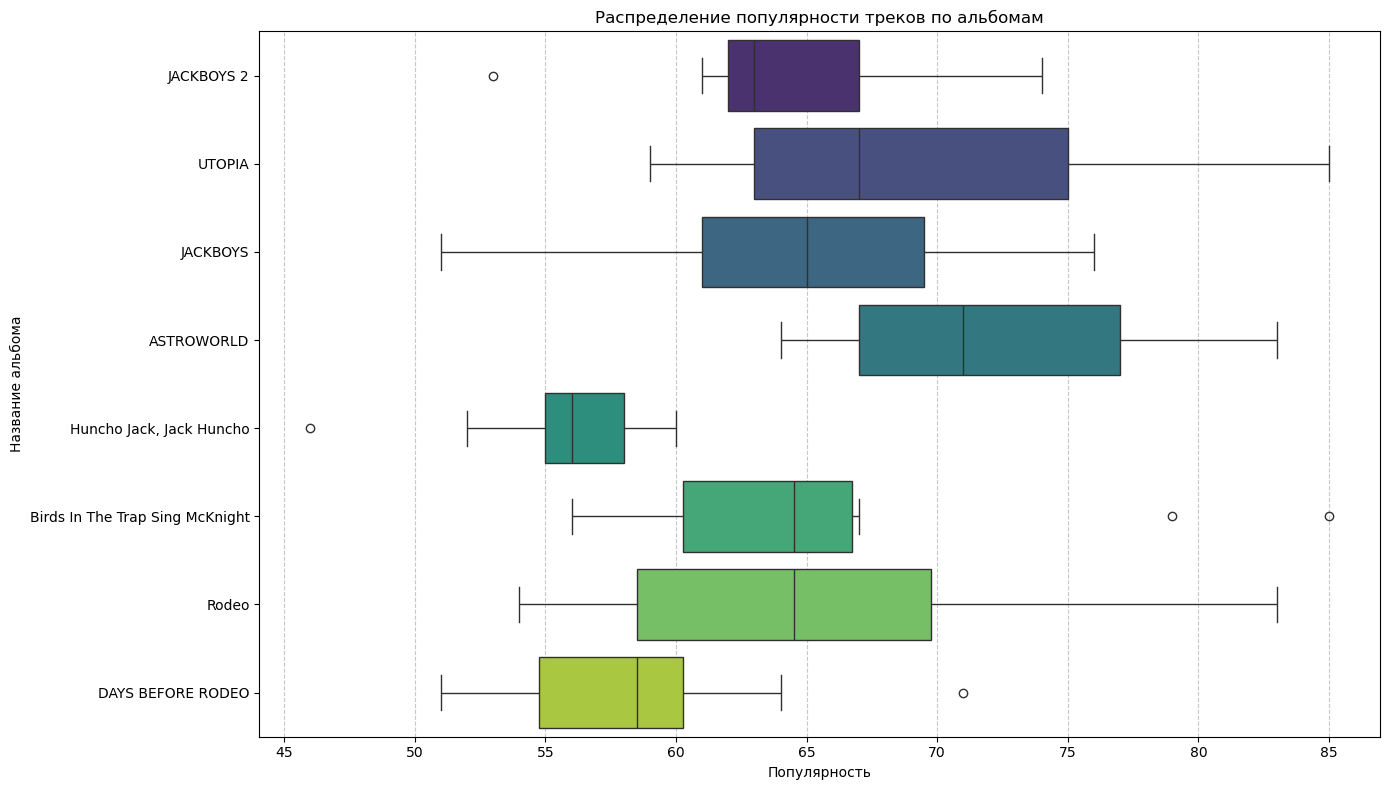

In [24]:
print('Построение boxplot для популярности треков по альбомам:')

plt.figure(figsize=(14, 8))
sns.boxplot(data=df, x='popularity', y='album_name', hue='album_name', palette='viridis', legend=False)
plt.title('Распределение популярности треков по альбомам')
plt.xlabel('Популярность')
plt.ylabel('Название альбома')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Построение тепловой карты корреляций:


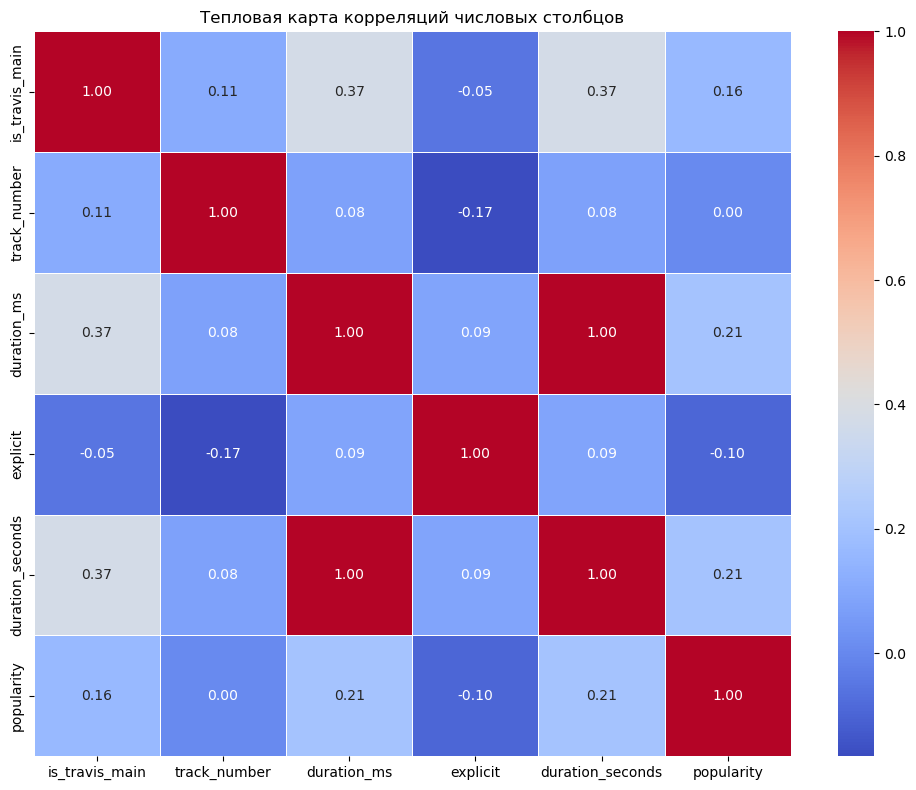

In [25]:
print('Построение тепловой карты корреляций:')

# Вычисляем матрицу корреляций для числовых столбцов
correlation_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Тепловая карта корреляций числовых столбцов')
plt.tight_layout()
plt.show()

In [26]:
print('--- Группировка по album_name с различными агрегациями (количество, среднее, медиана, сумма) ---')
agg_data = df.groupby('album_name').agg(
    total_tracks=('track_id', 'count'), # Подсчёт количества
    avg_popularity=('popularity', 'mean'), # Среднее
    median_popularity=('popularity', 'median'), # Медиана
    total_duration_seconds=('duration_seconds', 'sum') # Суммирование
).reset_index()
display(agg_data.head())

--- Группировка по album_name с различными агрегациями (количество, среднее, медиана, сумма) ---


,album_name,total_tracks,avg_popularity,median_popularity,total_duration_seconds
0,ASTROWORLD,17,72.117647,71.0,3522.26
1,Birds In The Trap Sing McKnight,14,65.500000,64.5,3225.20
2,DAYS BEFORE RODEO,12,58.583333,58.5,2861.14
3,"Huncho Jack, Jack Huncho",13,55.615385,56.0,2493.80
4,JACKBOYS,7,64.714286,65.0,1282.59


In [27]:
print('--- Количество треков по году выпуска ---')
df['release_year'] = df['release_date'].dt.year
tracks_per_year = df.groupby('release_year')['track_id'].count().reset_index(name='track_count')
display(tracks_per_year.head())

--- Количество треков по году выпуска ---


,release_year,track_count
0,2014,12
1,2015,16
2,2016,14
3,2017,13
4,2018,17


In [28]:
print('--- Средняя популярность и продолжительность по is_travis_main и explicit ---')
avg_stats = df.groupby(['is_travis_main', 'explicit']).agg(
    avg_popularity=('popularity', 'mean'),
    avg_duration_seconds=('duration_seconds', 'mean')
).reset_index()
display(avg_stats)

--- Средняя популярность и продолжительность по is_travis_main и explicit ---


,is_travis_main,explicit,avg_popularity,avg_duration_seconds
0,0,1,60.125000,132.712500
1,1,0,69.250000,192.425000
2,1,1,65.300971,231.530194
